In [140]:
import pandas as pd
import seaborn as sns
import numpy as np

In [142]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure


In [144]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots


In [146]:
df = pd.read_csv(r'/Users/austinsmithers/Desktop/Data_sets/NYC_RE_Sales/NYC_SALES.csv')

In [148]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASEMENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,...,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE,BOROUGH_CLEAN,STREET_ADDRESS,ADDRESS_CLEAN,UNIT_CLEAN,DATE_STRING,MONTH,row_num
0,4,REGO PARK,44 CONDO PARKING,4,2119,1171,NaN,RG,"100-25 QUEENS BLVD, P-9",P-9,...,RG,41296,2023-12-07,Queens,"[100-25 QUEENS BLVD, P-9]",100-25 QUEENS BLVD,P-9,20231207,December,1
1,1,FLATIRON,10 COOPS - ELEVATOR APARTMENTS,2,846,71,NaN,D0,"105 5TH AVENUE, 7C",NaN,...,D0,1882000,2023-12-05,Manhattan,"[105 5TH AVENUE, 7C]",105 5TH AVENUE,7C,20231205,December,1
2,4,ASTORIA,14 RENTALS - 4-10 UNIT,2B,503,23,NaN,S5,11-36 31ST AVENUE,NaN,...,S5,2100000,2023-08-11,Queens,[11-36 31ST AVENUE],11-36 31ST AVENUE,NaN,20230811,August,1
3,3,GREENPOINT,04 TAX CLASS 1 CONDOS,1C,2540,1401,NaN,R6,"112 INDIA STREET, 1",1,...,R6,3300000,2023-06-15,Brooklyn,"[112 INDIA STREET, 1]",112 INDIA STREET,1,20230615,June,1
4,3,GREENPOINT,04 TAX CLASS 1 CONDOS,1C,2540,1403,NaN,R6,"112 INDIA STREET, 3",3,...,R6,3258400,2024-04-05,Brooklyn,"[112 INDIA STREET, 3]",112 INDIA STREET,3,20240405,April,1


In [150]:
# Check for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

BOROUGH - 0.0%
NEIGHBORHOOD - 0.0%
BUILDING_CLASS_CATEGORY - 0.0%
TAX_CLASS_AT_PRESENT - 0.0%
BLOCK - 0.0%
LOT - 0.0%
EASEMENT - 1.0%
BUILDING_CLASS_AT_PRESENT - 0.0%
ADDRESS - 0.0%
APARTMENT_NUMBER - 0.9306051840508196%
ZIP_CODE - 0.0%
RESIDENTIAL_UNITS - 0.3630537122114457%
COMMERCIAL_UNITS - 0.3898530996540185%
TOTAL_UNITS - 0.3427485678634224%
LAND_SQUARE_FEET - 0.41015824400204187%
GROSS_SQUARE_FEET - 0.41015824400204187%
YEAR_BUILT - 0.013640746412568771%
TAX_CLASS_AT_TIME_OF_SALE - 0.0%
BUILDING_CLASS_AT_TIME_OF_SALE - 0.0%
SALE_PRICE - 0.0%
SALE_DATE - 0.0%
BOROUGH_CLEAN - 0.0%
STREET_ADDRESS - 0.0%
ADDRESS_CLEAN - 0.0%
UNIT_CLEAN - 0.5778741988542907%
DATE_STRING - 0.0%
MONTH - 0.0%
row_num - 0.0%


In [152]:
# check data types
df.dtypes

BOROUGH                             int64
NEIGHBORHOOD                       object
BUILDING_CLASS_CATEGORY            object
TAX_CLASS_AT_PRESENT               object
BLOCK                               int64
LOT                                 int64
EASEMENT                          float64
BUILDING_CLASS_AT_PRESENT          object
ADDRESS                            object
APARTMENT_NUMBER                   object
ZIP_CODE                            int64
RESIDENTIAL_UNITS                 float64
COMMERCIAL_UNITS                  float64
TOTAL_UNITS                       float64
LAND_SQUARE_FEET                  float64
GROSS_SQUARE_FEET                 float64
YEAR_BUILT                        float64
TAX_CLASS_AT_TIME_OF_SALE           int64
BUILDING_CLASS_AT_TIME_OF_SALE     object
SALE_PRICE                          int64
SALE_DATE                          object
BOROUGH_CLEAN                      object
STREET_ADDRESS                     object
ADDRESS_CLEAN                     

In [154]:
# sort values by date and price
df.sort_values(by=['SALE_DATE', 'DATE_STRING'], inplace=False, ascending=True).head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASEMENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,...,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE,BOROUGH_CLEAN,STREET_ADDRESS,ADDRESS_CLEAN,UNIT_CLEAN,DATE_STRING,MONTH,row_num
35,3,BRIGHTON BEACH,07 RENTALS - WALKUP APARTMENTS,2B,8676,29,NaN,C5,3027 BRIGHTON 6TH STREET,NaN,...,C5,900000,2023-06-01,Brooklyn,[3027 BRIGHTON 6TH STREET],3027 BRIGHTON 6TH STREET,NaN,20230601,June,1
308,1,CHELSEA,46 CONDO STORE BUILDINGS,4,800,1301,NaN,RK,"101 WEST 24TH STREET, CU",CU,...,RK,10080000,2023-06-01,Manhattan,"[101 WEST 24TH STREET, CU]",101 WEST 24TH STREET,CU,20230601,June,1
610,2,THROGS NECK,01 ONE FAMILY DWELLINGS,1D,5455,60,NaN,A8,"11 LINDEN AVENUE, 11",NaN,...,A8,290000,2023-06-01,Bronx,"[11 LINDEN AVENUE, 11]",11 LINDEN AVENUE,11,20230601,June,1
682,3,DOWNTOWN-FULTON MALL,11 SPECIAL CONDO BILLING LOTS,2,149,1102,NaN,RR,"138 WILLOUGHBY STREET, 51J",RESI,...,RR,1460098,2023-06-01,Brooklyn,"[138 WILLOUGHBY STREET, 51J]",138 WILLOUGHBY STREET,51J,20230601,June,1
815,3,PROSPECT HEIGHTS,44 CONDO PARKING,4,1153,1621,NaN,RG,"336 SAINT MARKS AVENUE, PS8",PS8,...,RG,10000,2023-06-01,Brooklyn,"[336 SAINT MARKS AVENUE, PS8]",336 SAINT MARKS AVENUE,PS8,20230601,June,1


In [156]:
# drop easement, date and row num columns (all the same values). Will not show up on heat map.
df = df.drop(columns=['row_num', 'EASEMENT', 'DATE_STRING'])

In [158]:
#convert object types to category for heat map
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

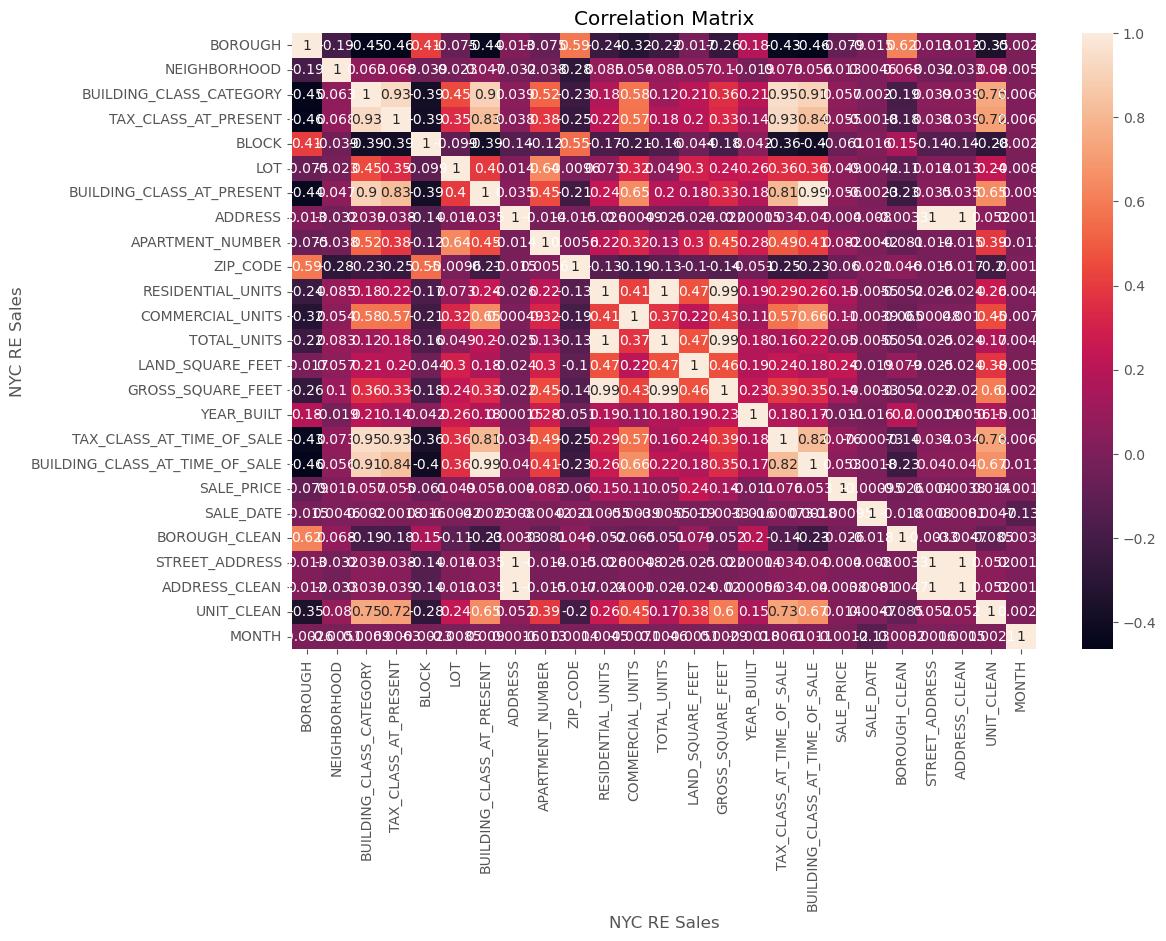

In [160]:
# create heat map
correlation_matrix = df_numerized.corr()
sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation Matrix")
plt.xlabel("NYC RE Sales")
plt.ylabel("NYC RE Sales")
plt.show()

In [162]:
# view correlation table
df_numerized.corr()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,...,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE,BOROUGH_CLEAN,STREET_ADDRESS,ADDRESS_CLEAN,UNIT_CLEAN,MONTH
BOROUGH,1.000000,-0.190233,-0.448739,-0.463076,0.410335,-0.074622,-0.438412,0.012970,-0.074886,0.587718,...,0.184892,-0.431579,-0.464287,-0.079180,-0.014770,0.620230,0.012971,0.011591,-0.350321,-0.002584
NEIGHBORHOOD,-0.190233,1.000000,0.063374,0.068018,-0.039039,-0.022845,0.046693,-0.031856,-0.037744,-0.281841,...,-0.019389,0.072926,0.056305,0.012542,0.004596,0.068129,-0.031862,-0.032552,0.080350,-0.005073
BUILDING_CLASS_CATEGORY,-0.448739,0.063374,1.000000,0.930662,-0.385315,0.446444,0.899520,0.039243,0.521954,-0.233068,...,0.205348,0.945858,0.906760,0.056806,0.001995,-0.187163,0.039238,0.039480,0.748581,0.006886
TAX_CLASS_AT_PRESENT,-0.463076,0.068018,0.930662,1.000000,-0.390789,0.347854,0.826265,0.038437,0.384630,-0.251093,...,0.140938,0.929603,0.836923,0.055079,-0.001814,-0.179140,0.038427,0.038841,0.718773,0.006296
BLOCK,0.410335,-0.039039,-0.385315,-0.390789,1.000000,-0.099270,-0.386571,-0.141446,-0.122324,0.550054,...,0.042484,-0.358700,-0.400344,-0.060739,0.015617,0.148277,-0.141444,-0.141659,-0.280140,-0.002343
LOT,-0.074622,-0.022845,0.446444,0.347854,-0.099270,1.000000,0.397848,0.014113,0.635937,-0.009639,...,0.263497,0.364664,0.355876,0.048508,-0.004190,-0.106741,0.014111,0.013220,0.237069,-0.008526
BUILDING_CLASS_AT_PRESENT,-0.438412,0.046693,0.899520,0.826265,-0.386571,0.397848,1.000000,0.035167,0.450855,-0.209250,...,0.180286,0.810702,0.987272,0.055825,-0.002330,-0.226694,0.035164,0.035326,0.645922,0.008997
ADDRESS,0.012970,-0.031856,0.039243,0.038437,-0.141446,0.014113,0.035167,1.000000,-0.014061,-0.015229,...,0.000151,0.034013,0.039542,0.004010,0.008007,-0.003326,0.999999,0.999749,0.051875,0.001596
APARTMENT_NUMBER,-0.074886,-0.037744,0.521954,0.384630,-0.122324,0.635937,0.450855,-0.014061,1.000000,0.005567,...,0.275733,0.489649,0.405980,0.082036,-0.004188,-0.080909,-0.014063,-0.014561,0.390879,-0.012725
ZIP_CODE,0.587718,-0.281841,-0.233068,-0.251093,0.550054,-0.009639,-0.209250,-0.015229,0.005567,1.000000,...,-0.050976,-0.247517,-0.225952,-0.059507,0.021062,0.045683,-0.015222,-0.016825,-0.201476,0.001415


In [164]:
import pandas as pd

# Increase the maximum number of rows and columns that pandas will display
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Disable line wrapping
pd.set_option('display.max_colwidth', None)  # Show full column width

# Compute the correlation matrix
correlation_matrix = df_numerized.corr()

# Unstack the correlation matrix to create a series of correlation pairs
correlation_pairs = correlation_matrix.unstack()

# Sort the correlation pairs
sorted_pairs = correlation_pairs.sort_values()

# Remove self-correlations (where column is correlated with itself)
sorted_pairs = sorted_pairs[sorted_pairs != 1.0]

# Print all the sorted correlation pairs
print(sorted_pairs)

BUILDING_CLASS_AT_TIME_OF_SALE  BOROUGH                          -0.464287
BOROUGH                         BUILDING_CLASS_AT_TIME_OF_SALE   -0.464287
TAX_CLASS_AT_PRESENT            BOROUGH                          -0.463076
BOROUGH                         TAX_CLASS_AT_PRESENT             -0.463076
                                BUILDING_CLASS_CATEGORY          -0.448739
BUILDING_CLASS_CATEGORY         BOROUGH                          -0.448739
BOROUGH                         BUILDING_CLASS_AT_PRESENT        -0.438412
BUILDING_CLASS_AT_PRESENT       BOROUGH                          -0.438412
TAX_CLASS_AT_TIME_OF_SALE       BOROUGH                          -0.431579
BOROUGH                         TAX_CLASS_AT_TIME_OF_SALE        -0.431579
BUILDING_CLASS_AT_TIME_OF_SALE  BLOCK                            -0.400344
BLOCK                           BUILDING_CLASS_AT_TIME_OF_SALE   -0.400344
TAX_CLASS_AT_PRESENT            BLOCK                            -0.390789
BLOCK                    